## GeoPandas

In [ ]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read and Process GeoJSON data
# If you are familiar with with Pandas, the transition will be easy

gdf = gpd.read_file('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/GeoData/gadm41_PHL_2.json')
gdf.to_csv('data.csv')

# head, tail, columns, crs, geometry

In [ ]:
# Calculate centroids

gdf['centroid_x'] = gdf['geometry'].centroid.x
gdf['centroid_y'] = gdf['geometry'].centroid.y

gdf

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,centroid_x,centroid_y
0,PHL.1.1_1,PHL,Philippines,PHL.1_1,Abra,NA,Bangued,NA,NA,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.6113 17.4956, 120.6055 17....",120.607094,17.600613
1,PHL.1.2_1,PHL,Philippines,PHL.1_1,Abra,NA,Boliney,NA,NA,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"MULTIPOLYGON (((120.814 17.3421, 120.7686 17.3...",120.868131,17.379642
2,PHL.1.3_1,PHL,Philippines,PHL.1_1,Abra,NA,Bucay,NA,NA,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"MULTIPOLYGON (((120.6777 17.4574, 120.6732 17....",120.722587,17.522872
3,PHL.1.4_1,PHL,Philippines,PHL.1_1,Abra,NA,Bucloc,NA,NA,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"MULTIPOLYGON (((120.7892 17.4452, 120.8846 17....",120.847782,17.437573
4,PHL.1.5_1,PHL,Philippines,PHL.1_1,Abra,NA,Daguioman,NA,NA,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"MULTIPOLYGON (((120.9075 17.4193, 120.8928 17....",120.951525,17.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,PHL.81.12_1,PHL,Philippines,PHL.81_1,ZamboangaSibugay,NA,RosellerLim,NA,NA,Bayan|Munisipyo,Municipality,98312,PH.ZS.RS,"MULTIPOLYGON (((122.4742 7.63, 122.475 7.6267,...",122.424755,7.705188
1643,PHL.81.13_1,PHL,Philippines,PHL.81_1,ZamboangaSibugay,NA,Siay,NA,NA,Bayan|Munisipyo,Municipality,98313,PH.ZS.SA,"MULTIPOLYGON (((122.8697 7.6548, 122.8676 7.65...",122.867228,7.727850
1644,PHL.81.14_1,PHL,Philippines,PHL.81_1,ZamboangaSibugay,NA,Talusan,NA,NA,Bayan|Munisipyo,Municipality,98314,PH.ZS.TL,"MULTIPOLYGON (((122.8945 7.3564, 122.9092 7.35...",122.855277,7.369784
1645,PHL.81.15_1,PHL,Philippines,PHL.81_1,ZamboangaSibugay,NA,Titay,NA,NA,Bayan|Munisipyo,Municipality,98315,PH.ZS.TT,"MULTIPOLYGON (((122.4886 7.764, 122.4855 7.770...",122.578329,7.851549


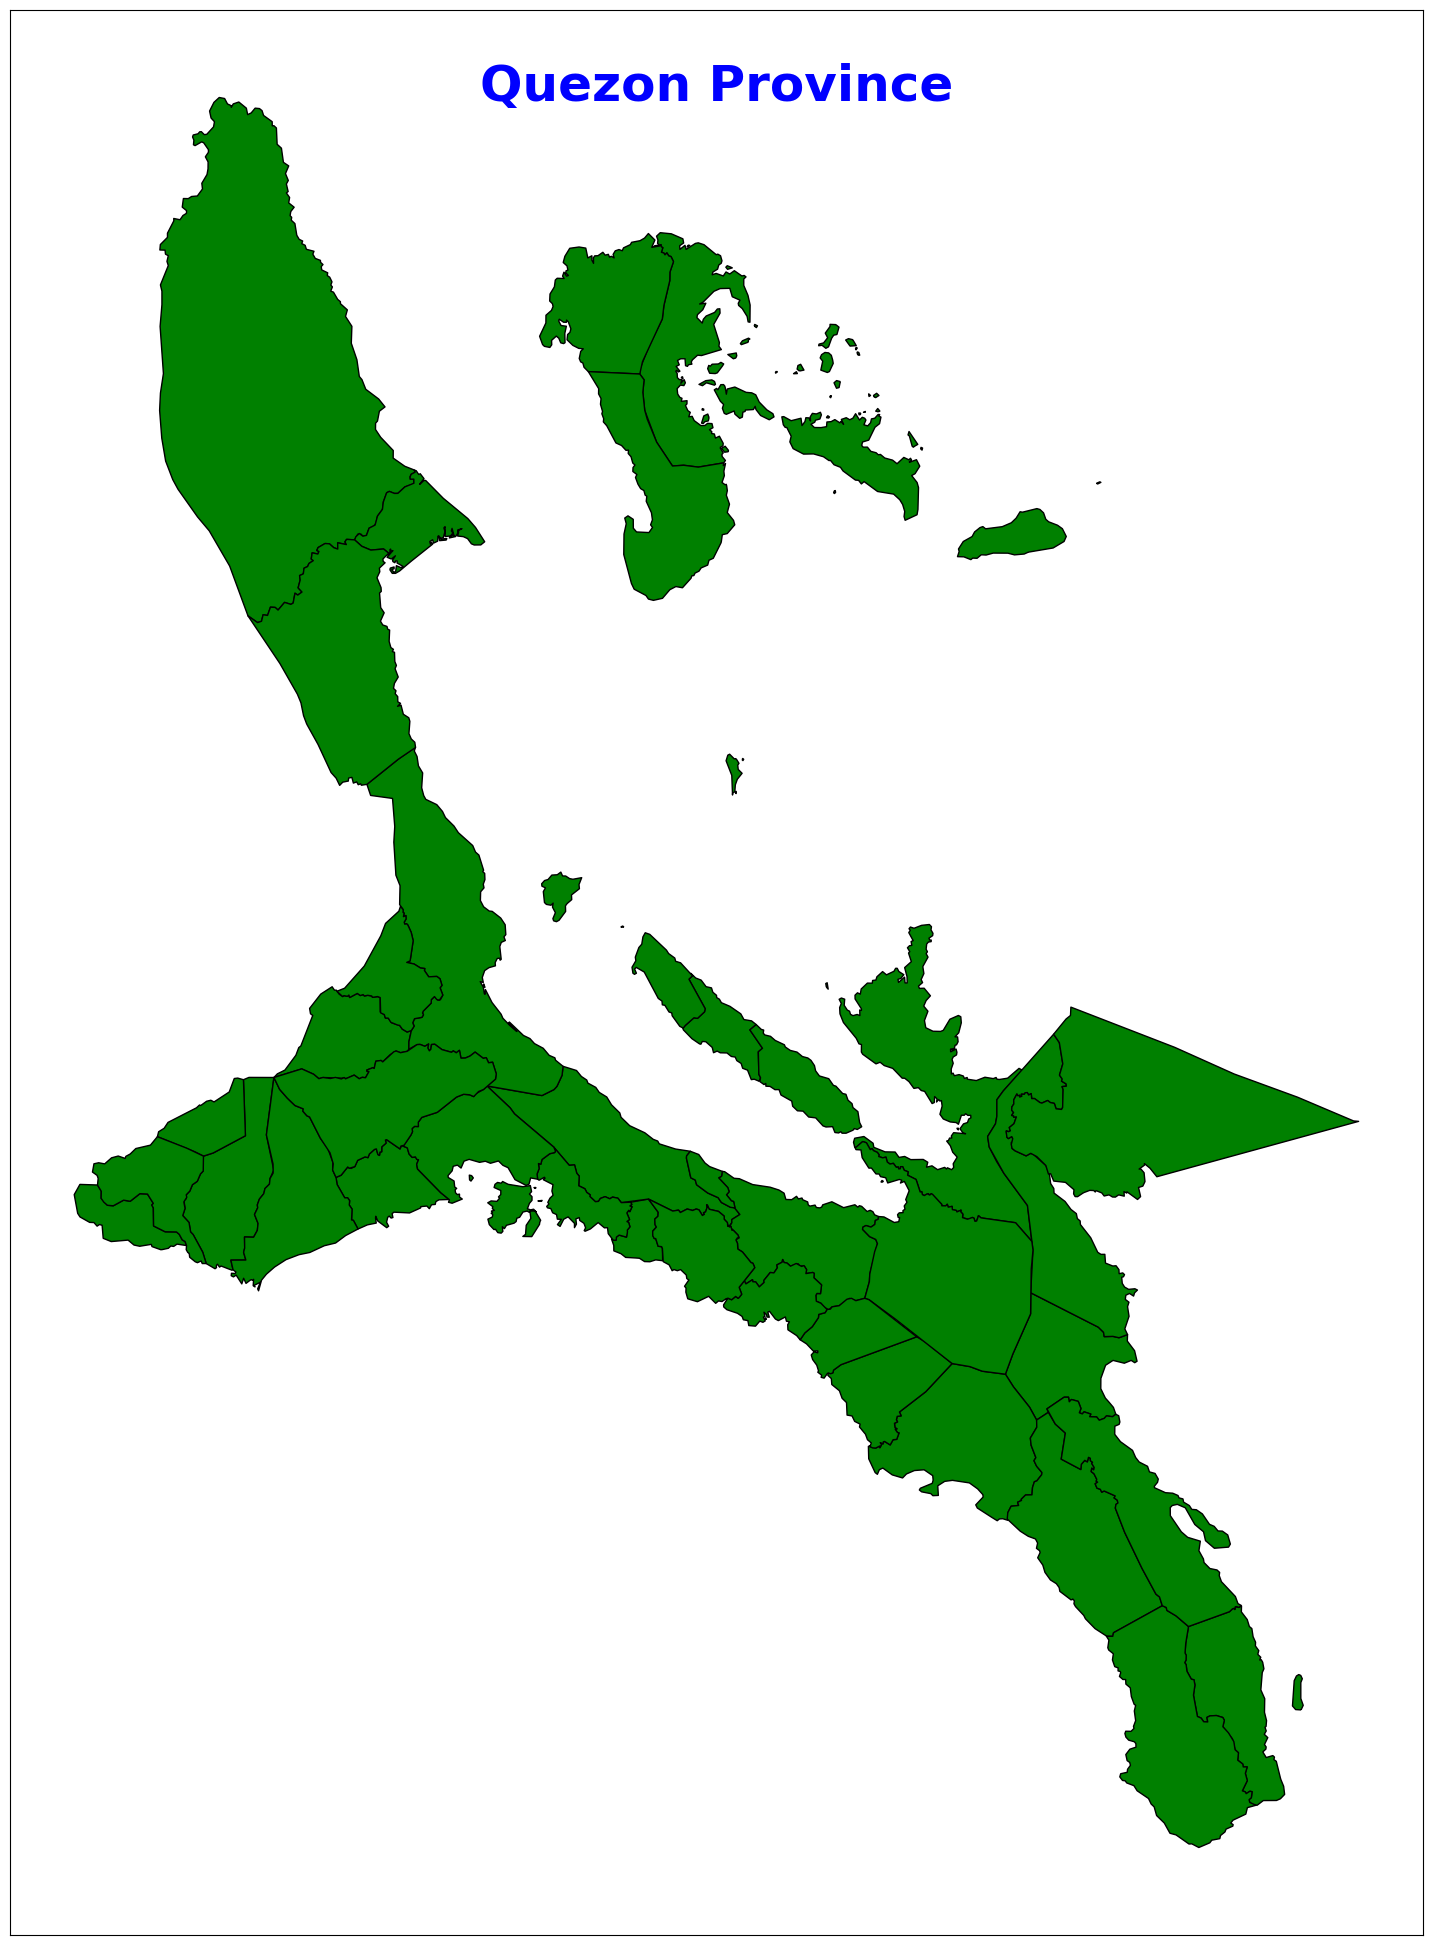

In [ ]:
# Basic Plotting

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

x = gdf.query("NAME_1 == 'Quezon'")
x = x.drop(index = [1309])

x.plot(ax = ax, color = 'green', edgecolor = 'black')

# Add a title
ax.set_title("", pad = 40, fontweight = 'bold', fontsize = 18)

# Add grid
# ax.grid(alpha = 0.5)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Here is a simple approach to add text (x, y, 'text')
ax.text(0.50, 0.96, 'Quezon Province', transform = ax.transAxes, fontsize=36, fontweight='bold',
        ha='center', va='center', color='blue')


plt.show()

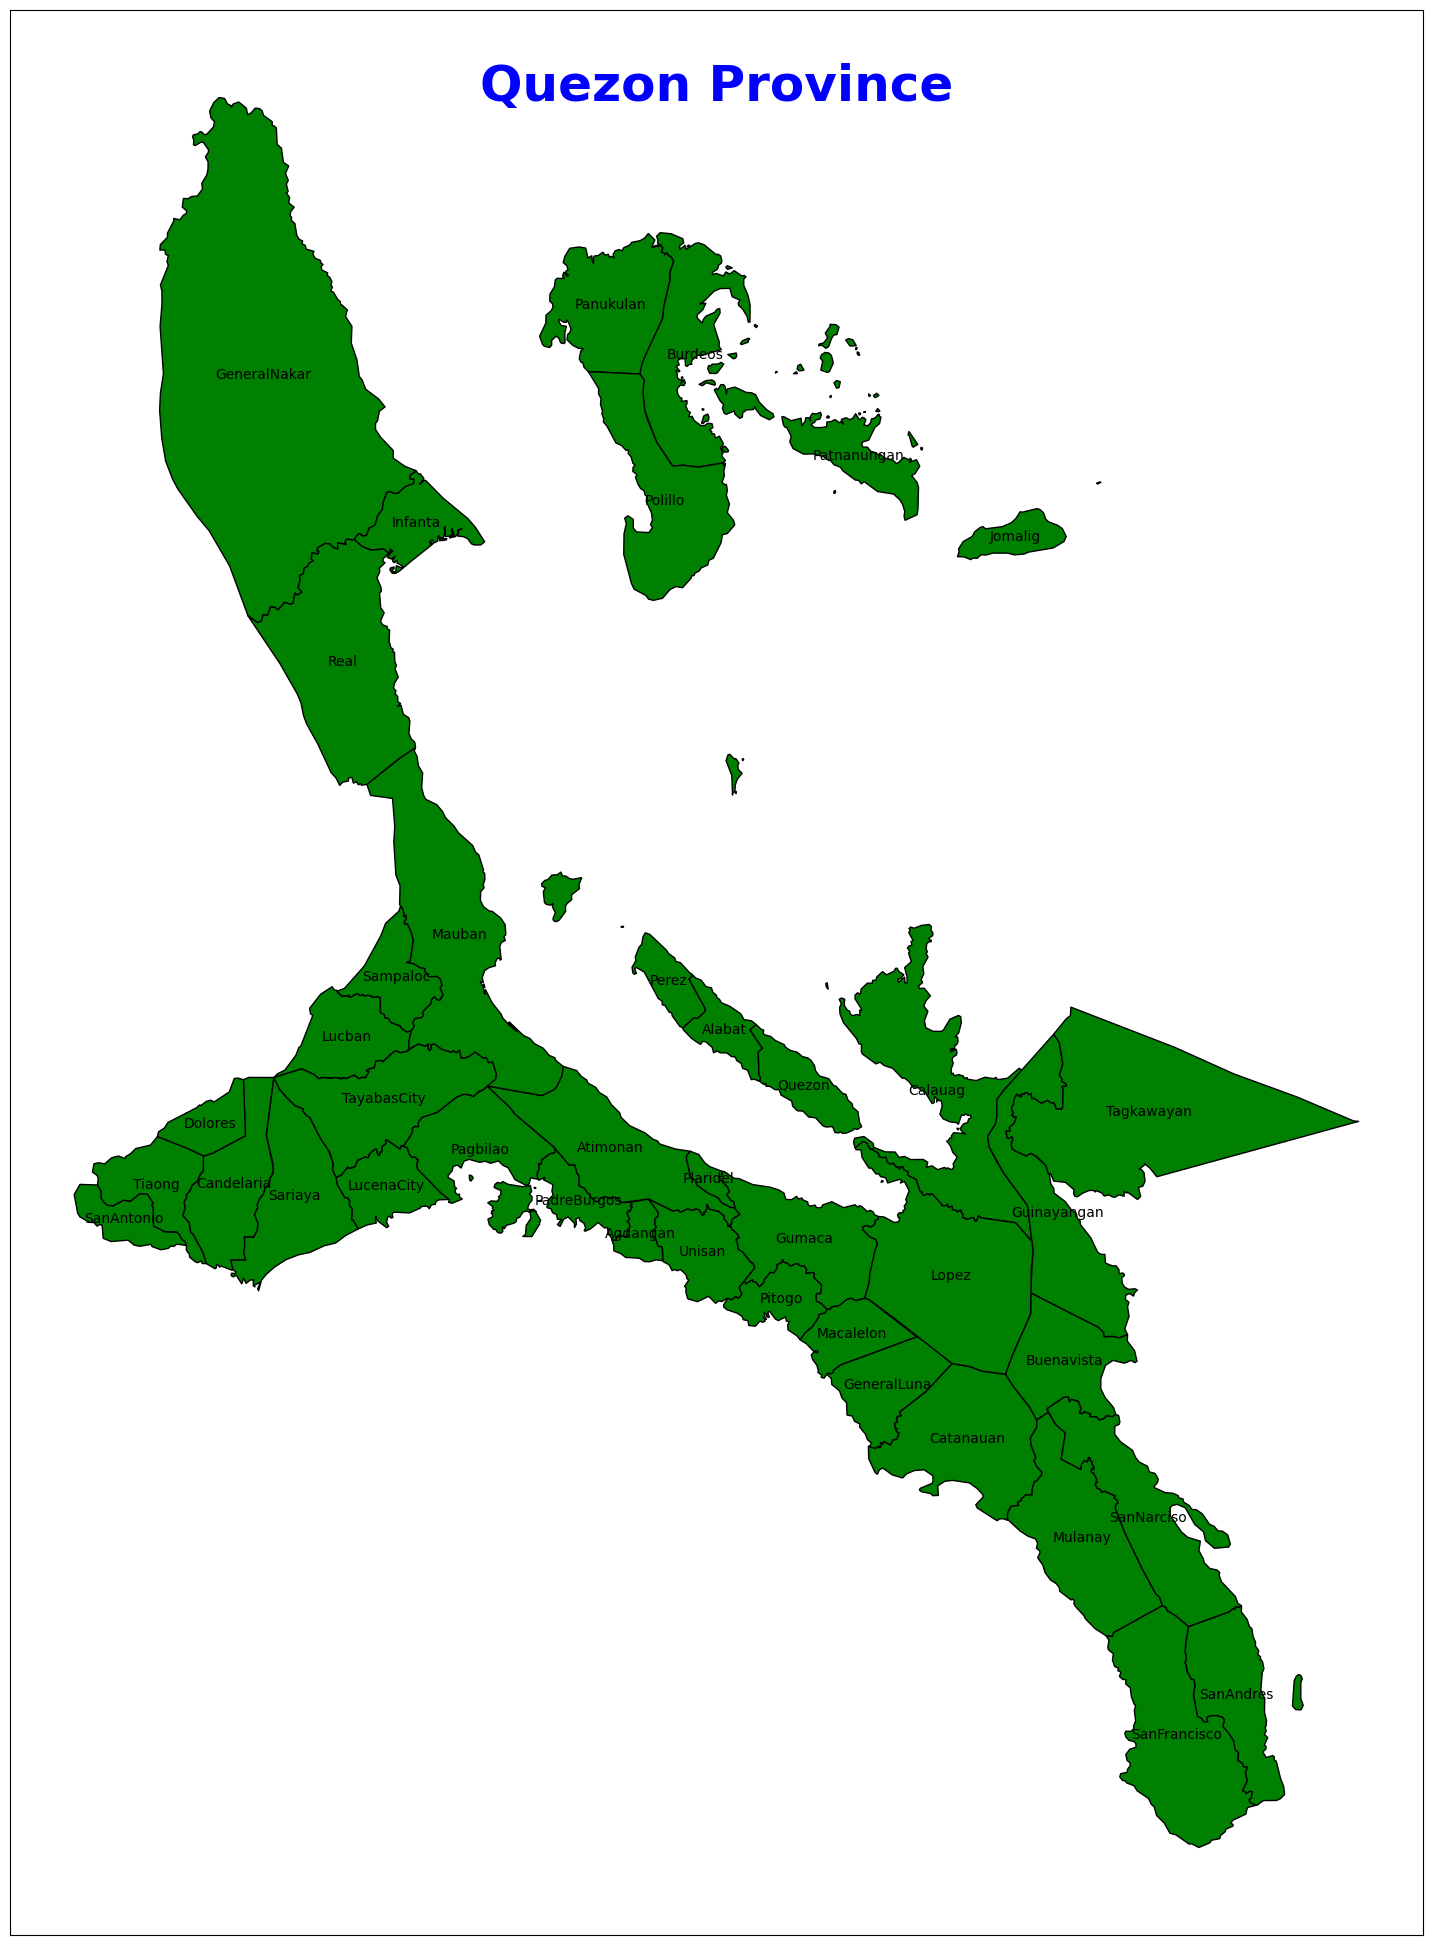

In [ ]:
# Basic Plotting (Annotated)

# Create a plot with a custom figure size of 10 inches wide by 8 inches tall
fig, ax = plt.subplots(figsize=(25, 25))

x = gdf.query("NAME_1 == 'Quezon'")
x = x.drop(index = [1309])

x.plot(ax = ax, color = 'green', edgecolor = 'black')

# Add a title
ax.set_title("", pad = 40, fontweight = 'bold', fontsize = 18)

# Add grid
# ax.grid(alpha = 0.5)

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])

# Here is a simple approach to add text (x, y, 'text')
ax.text(0.50, 0.96, 'Quezon Province', transform = ax.transAxes, fontsize=36, fontweight='bold',
        ha='center', va='center', color='blue')

# Annotation with name of Municipalities
for idx, row in x.iterrows():

  ax.annotate(row['NAME_2'], xy = row['geometry'].centroid.coords[0], ha = 'center', va = 'center', fontsize = 10, color = 'black')

plt.show()